In [4]:
from sklearn.covariance import EmpiricalCovariance
import numpy as np

X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])


cov_matrix = np.cov(X, rowvar=False)

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


In [10]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, r2_score, silhouette_score
)
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# ---------- Classification ----------
y_true_cls = [1, 0, 1, 1, 0, 1]
y_pred_cls = [1, 0, 1, 0, 0, 1]

print("=== Classification Metrics ===")
print("Accuracy:", accuracy_score(y_true_cls, y_pred_cls))
print("Precision:", precision_score(y_true_cls, y_pred_cls))
print("Recall:", recall_score(y_true_cls, y_pred_cls))
print("F1 Score:", f1_score(y_true_cls, y_pred_cls))

# ---------- Regression ----------
y_true_reg = [3.0, -0.5, 2.0, 7.0]
y_pred_reg = [2.5, 0.0, 2.1, 7.8]

print("\n=== Regression Metrics ===")
print("Mean Squared Error:", mean_squared_error(y_true_reg, y_pred_reg))
print("R2 Score:", r2_score(y_true_reg, y_pred_reg))

# ---------- Clustering ----------
X, _ = make_blobs(n_samples=100, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)


print("\n=== Clustering Metrics ===")
print("Silhouette Score:", silhouette_score(X, kmeans.labels_))


=== Classification Metrics ===
Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571

=== Regression Metrics ===
Mean Squared Error: 0.2874999999999999
R2 Score: 0.9605995717344754

=== Clustering Metrics ===
Silhouette Score: 0.8469881221532085


c:\Users\DEll\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


=== Linear Regression ===
MSE: 2821.7509810013103
R2 Score: 0.4772897164322618

Cross-validation R2 Scores: [0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
Mean CV R2: 0.48231643590864215
[0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
=== GridSearchCV Results ===
Best Alpha: 0.1
Best CV Score: 0.4508506334242748

=== RandomizedSearchCV Results ===
Best Alpha: 0.01
Best CV Score: 0.45270246015217736

=== Test Evaluation ===
MSE: 2819.688330911984
R2 Score: 0.47767180841002743


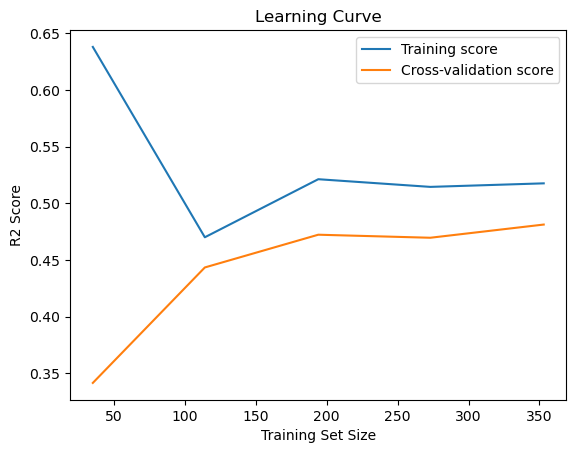

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ----- Load dataset -----
X, y = load_diabetes(return_X_y=True)

# ----- Split data into train and test -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----- Train a simple Linear Regression model -----
model = LinearRegression()
model.fit(X_train, y_train)

# ----- Predict and evaluate -----
y_pred = model.predict(X_test)
print("=== Linear Regression ===")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# ----- Cross-validation -----
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("\nCross-validation R2 Scores:", cv_scores)
print("Mean CV R2:", np.mean(cv_scores))




import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score

# Custom model that mimics sklearn structure
class MyLinearModel(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]   # add bias term
        self.theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        return self

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.theta

# Test with sample data
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

model = MyLinearModel()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(scores)





from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
)
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# ----- Load dataset -----
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ----- 1️⃣ Grid Search CV -----
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("=== GridSearchCV Results ===")
print("Best Alpha:", grid.best_params_['alpha'])
print("Best CV Score:", grid.best_score_)

# ----- 2️⃣ Randomized Search CV -----
param_dist = {'alpha': np.linspace(0.01, 100, 20)}  # sample 20 values randomly
random_search = RandomizedSearchCV(Ridge(), param_distributions=param_dist,
                                   n_iter=5, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print("\n=== RandomizedSearchCV Results ===")
print("Best Alpha:", random_search.best_params_['alpha'])
print("Best CV Score:", random_search.best_score_)

# ----- Evaluate best model -----
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\n=== Test Evaluation ===")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# ----- 3️⃣ Learning Curve -----
train_sizes, train_scores, test_scores = learning_curve(
    Ridge(alpha=random_search.best_params_['alpha']),
    X, y, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.title("Learning Curve")
plt.legend()
plt.show()



=== Original Data ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   color  
0    red  
1   blue  
2  green  
3   blue  
4    red  

Label Encoded 'color': ['blue' 'green' 'red']

=== One-Hot Encoded Data ===
   color_blue  color_green  color_red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0
4         0.0          0.0        1.0

Mean after StandardScaler: [-0. -0. -0. -0.]
Std after StandardScaler: [1. 1. 1. 1.]

Min of features: [0. 0. 0. 0.]
Max of feature